In [49]:
# IMPORTS
import re
import json

import spacy
import matplotlib.pyplot as plt

In [50]:
# Ouvrir et lire un fichier texte
with open("DDHC.txt", "r", encoding="utf-8") as f:
    texte = f.read() # lire le contenu du fichier
    # Autre option :
    lines = f.readlines() # lire le contenu du fichier ligne par ligne

In [51]:
# Essayez d'afficher les 100 premiers caractères du texte puis les 5 premières lignes
print(texte[:100])
print(lines[:5])
# Afficher les lignes ne marche pas, pourquoi ?
# Parce que le fichier a déjà été lu entièrement, on dit que les méthodes de lecture "consomment" le flux du fichier.
# Il faut réinitialiser le flux en rouvrant le fichier ou en utilisant f.seek(0) pour déplacer le curseur au début du fichier.

Déclaration des Droits de l'Homme et du Citoyen de 1789

Les représentants du peuple français, const
[]


In [52]:
# Découper le texte
mots = texte.split() # découpage par défaut sur les espaces
lignes = texte.split("\n") # découpage par saut de ligne

In [53]:
# Vérifier le découpage
print(mots[:10])  # Afficher les 10 premiers mots
print(lignes[:5]) # Afficher les 5 premières lignes

['Déclaration', 'des', 'Droits', 'de', "l'Homme", 'et', 'du', 'Citoyen', 'de', '1789']
["Déclaration des Droits de l'Homme et du Citoyen de 1789", '', "Les représentants du peuple français, constitués en Assemblée nationale, considérant que l'ignorance, l'oubli ou le mépris des droits de l'Homme sont les seules causes des malheurs publics et de la corruption des gouvernements, ont résolu d'exposer, dans une déclaration solennelle, les droits naturels, inaliénables et sacrés de l'Homme, afin que cette déclaration, constamment présente à tous les membres du corps social, leur rappelle sans cesse leurs droits et leurs devoirs ; afin que les actes du pouvoir législatif, et ceux du pouvoir exécutif, pouvant être à chaque instant comparés avec le but de toute institution politique, en soient plus respectés; afin que les réclamations des citoyens, fondées désormais sur des principes simples et incontestables, tournent toujours au maintien de la Constitution et au bonheur de tous.", '', "En co

In [54]:
# Expressions régulières
# Trouver toutes les occurrences du mot "patate" (insensible à la casse et avec ou sans "s" final)
occurrences = re.findall(r"patates?", texte, re.IGNORECASE)
print(f"Le mot 'patate(s)' apparaît {len(occurrences)} fois.")

Le mot 'patate(s)' apparaît 0 fois.


In [55]:
# Ouvrir et lire un fichier JSON
with open("DDHC.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [56]:
# Afficher les clés et valeurs du JSON
for key, value in data.items():
    print(f"Clé: {key}, Valeur: {value[:50]}...")  # Afficher les 50 premiers caractères de chaque valeur

Clé: Introduction, Valeur: Les représentants du peuple français, constitués e...
Clé: Article 1er, Valeur: Les Hommes naissent et demeurent libres et égaux e...
Clé: Article 2, Valeur: Le but de toute association politique est la conse...
Clé: Article 3, Valeur: Le principe de toute souveraineté réside essentiel...
Clé: Article 4, Valeur: La liberté consiste à pouvoir faire tout ce qui ne...
Clé: Article 5, Valeur: La loi n'a le droit de défendre que les actions nu...
Clé: Article 6, Valeur: La loi est l'expression de la volonté générale. To...
Clé: Article 7, Valeur: Nul Homme ne peut être accusé, arrêté ni détenu qu...
Clé: Article 8, Valeur: La loi ne doit établir que des peines strictement ...
Clé: Article 9, Valeur: Tout Homme étant présumé innocent jusqu'à ce qu'il...
Clé: Article 10, Valeur: Nul ne doit être inquiété pour ses opinions, même ...
Clé: Article 11, Valeur: La libre communication des pensées et des opinions...
Clé: Article 12, Valeur: La garantie des droits de l'Homm

In [57]:
# Utiliser spaCy pour le traitement du langage naturel
nlp = spacy.load("fr_core_news_sm")  # Charger le modèle petit modèle français de spaCy
doc = nlp(texte)  # Traiter le texte

In [58]:
# Faire de l'analyse morpho-syntaxique
for token in doc[:20]:  # Afficher les 20 premiers tokens
    print(f"Token: {token.text}, Lemma: {token.lemma_}, POS: {token.pos_}, Is Stop Word: {token.is_stop}")

liste_lemmes_et_pos = [(token.lemma_, token.pos_) for token in doc]
print(liste_lemmes_et_pos[:10])  # Afficher les 10 premiers lemmes et POS

df_token_lemma_pos_stop = [
    {
        "token": token.text,
        "lemma": token.lemma_,
        "pos": token.pos_,
        "is_stop": token.is_stop
    }
    for token in doc
]
print(df_token_lemma_pos_stop[:5])  # Afficher les 5 premiers dictionnaires

Token: Déclaration, Lemma: déclaration, POS: NOUN, Is Stop Word: False
Token: des, Lemma: de, POS: ADP, Is Stop Word: True
Token: Droits, Lemma: droit, POS: NOUN, Is Stop Word: False
Token: de, Lemma: de, POS: ADP, Is Stop Word: True
Token: l', Lemma: le, POS: DET, Is Stop Word: True
Token: Homme, Lemma: homme, POS: NOUN, Is Stop Word: False
Token: et, Lemma: et, POS: CCONJ, Is Stop Word: True
Token: du, Lemma: de, POS: ADP, Is Stop Word: True
Token: Citoyen, Lemma: citoyen, POS: NOUN, Is Stop Word: False
Token: de, Lemma: de, POS: ADP, Is Stop Word: True
Token: 1789, Lemma: 1789, POS: NUM, Is Stop Word: False
Token: 

, Lemma: 

, POS: SPACE, Is Stop Word: False
Token: Les, Lemma: le, POS: DET, Is Stop Word: True
Token: représentants, Lemma: représentant, POS: NOUN, Is Stop Word: False
Token: du, Lemma: de, POS: ADP, Is Stop Word: True
Token: peuple, Lemma: peuple, POS: NOUN, Is Stop Word: False
Token: français, Lemma: français, POS: ADJ, Is Stop Word: False
Token: ,, Lemma: ,, POS: P

In [59]:
## FACULTATIF : Afficher joliment avec pprint
from pprint import pprint
pprint(df_token_lemma_pos_stop[:5])  # Afficher les 5 premiers dictionnaires joliment

[{'is_stop': False,
  'lemma': 'déclaration',
  'pos': 'NOUN',
  'token': 'Déclaration'},
 {'is_stop': True, 'lemma': 'de', 'pos': 'ADP', 'token': 'des'},
 {'is_stop': False, 'lemma': 'droit', 'pos': 'NOUN', 'token': 'Droits'},
 {'is_stop': True, 'lemma': 'de', 'pos': 'ADP', 'token': 'de'},
 {'is_stop': True, 'lemma': 'le', 'pos': 'DET', 'token': "l'"}]


In [60]:
## FACULTATIF : Créer un DataFrame pandas
import pandas as pd
df = pd.DataFrame(df_token_lemma_pos_stop)
df.head()  # Afficher les 5 (5 par défaut mais configurable) premières lignes du DataFrame

,token,lemma,pos,is_stop
0,Déclaration,déclaration,NOUN,False
1,des,de,ADP,True
2,Droits,droit,NOUN,False
3,de,de,ADP,True
4,l',le,DET,True


In [61]:
# Calculer la fréquence des lemmes
compteur = {}
for token in doc:
    lemma = token.lemma_.lower()  # Utiliser le lemme en minuscules
    if lemma not in compteur:
        compteur[lemma] = 0
    compteur[lemma] += 1
# Trier les lemmes par fréquence décroissante
frequences = sorted(compteur.items(), key=lambda x: x[1], reverse=True)
print(frequences[:10])  # Afficher les 10 lemmes les plus

[('le', 92), ('de', 65), (',', 63), ('être', 33), ('et', 32), ('.', 28), ('\n\n', 23), ('ne', 21), ('tout', 20), ('droit', 18)]


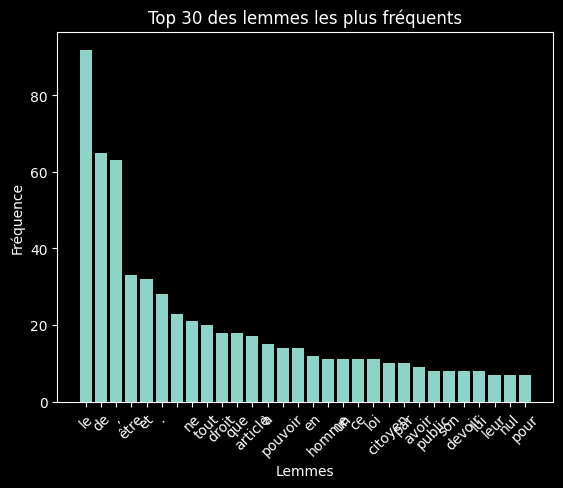

In [67]:
# Visualiser les 30 lemmes les plus fréquents
top_30_lemmes = frequences[:30]
lemmes, counts = zip(*top_30_lemmes) # on casse la liste de tuples puis on zippe les éléments
# zip marche vraiment comme une fermeture éclair, c'est une fonction qui prend deux séquences et crée des tuples en prenant un élément de chaque séquence à la fois
plt.bar(lemmes, counts)
plt.xlabel("Lemmes")
plt.ylabel("Fréquence")
plt.title("Top 30 des lemmes les plus fréquents")
plt.xticks(rotation=45)
plt.show()


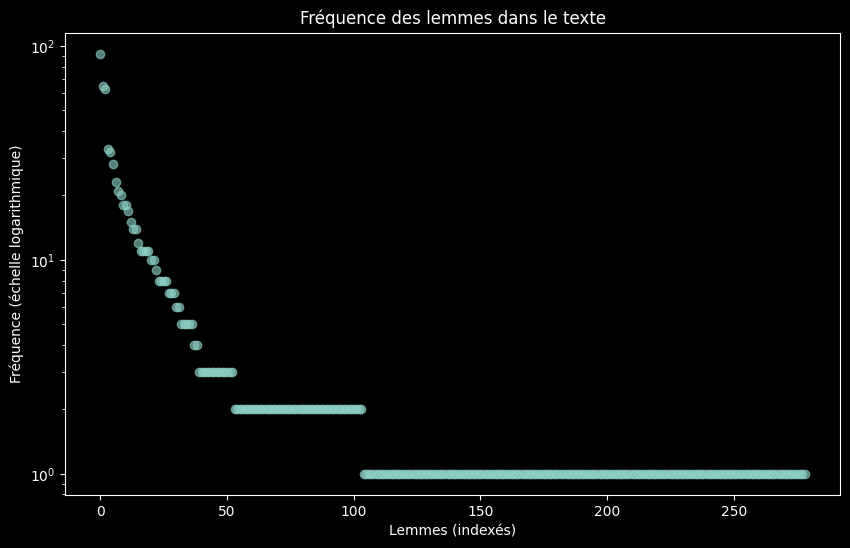

In [68]:
# Visualiser tous les lemmes selon leur fréquence (nuage de points)
all_lemmes, all_counts = zip(*frequences)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(all_lemmes)), all_counts, alpha=0.6)
plt.yscale("log")  # Échelle logarithmique pour mieux visualiser les
plt.xlabel("Lemmes (indexés)")
plt.ylabel("Fréquence (échelle logarithmique)")
plt.title("Fréquence des lemmes dans le texte")
plt.show() # on remarque une distribution de type loi de Zipf, avec quelques lemmes très fréquents puis une décroissance rapide vers une longue traîne de lemmes rares.